   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Admit  Admit Class  Log_Odds  Probability  
0         1   0.92            1  7.306455     0.999329  
1         1   0.76            1  4.667375     0.990691  
2         1   0.72            1  1.723786     0.848616  
3         1   0.80            1  3.990688     0.981849  
4         0   0.65            1  2.434307     0.919406  


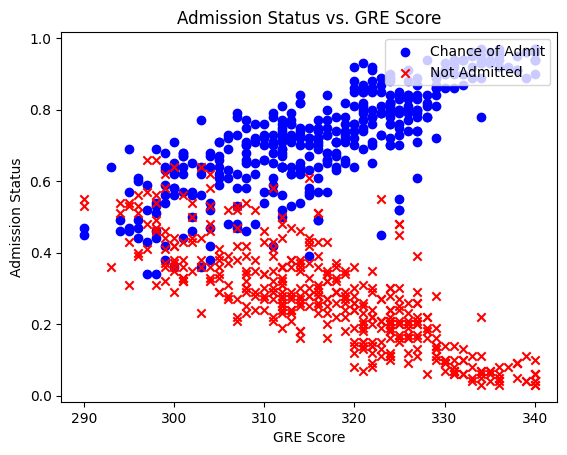

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# a) Import Admission_Predict dataset, display it, and visualize various columns
data = pd.read_csv("Admission_Predict.csv")

# Display the dataset
print(data.head())


# Visualize various columns (for example, GRE Score, TOEFL Score, etc.)
plt.scatter(data['GRE Score'], data['Admit'], marker='o', c='b', label='Chance of Admit')
plt.scatter(data['GRE Score'], 1 - data['Admit'], marker='x', c='r', label='Not Admitted')
plt.xlabel('GRE Score')
plt.ylabel('Admission Status')
plt.legend(loc='upper right')
plt.title('Admission Status vs. GRE Score')
plt.show()

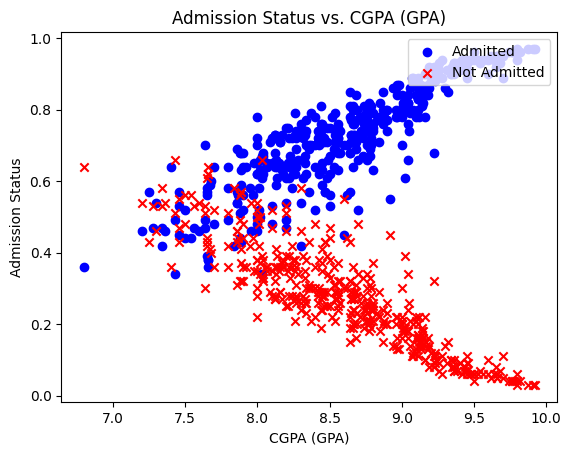

In [93]:
# b) Plot the dataset on GPA vs. admit score.
plt.scatter(data['CGPA'], data['Admit'], marker='o', c='b', label='Admitted')
plt.scatter(data['CGPA'], 1 - data['Admit'], marker='x', c='r', label='Not Admitted')
plt.xlabel('CGPA (GPA)')
plt.ylabel('Admission Status')
plt.legend(loc='upper right')
plt.title('Admission Status vs. CGPA (GPA)')
plt.show()


In [94]:
# c) Find the slope and intercept of the line to fit.
data['Admit Class'] = (data['Admit'] >= 0.5).astype(int)
data.to_csv('Admission_Predict.csv', index=False)

X = data[['CGPA']].values  # Reshape feature to (n_samples, n_features)
y = data['Admit Class'].values  # Reshape target to (n_samples, )
X=X.reshape(-1,1)
model = LogisticRegression()
model.fit(X, y)

slope = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"Slope: {slope}, Intercept: {intercept}")

Slope: 3.3834358054130025, Intercept: -25.343700528067295


In [95]:
# d) Compute the log odds for each entry and merge results as a new column
log_odds = model.decision_function(X)

# Create a new column 'Log_Odds' in the DataFrame to store the log odds
data['Log_Odds'] = log_odds

data.to_csv('Admission_Predict.csv', index=False)

In [96]:
# e) Using the log odds, compute the probability for each entry
data['Probability'] = 1 / (1 + np.exp(-log_odds))
data.to_csv('Admission_Predict.csv', index=False)


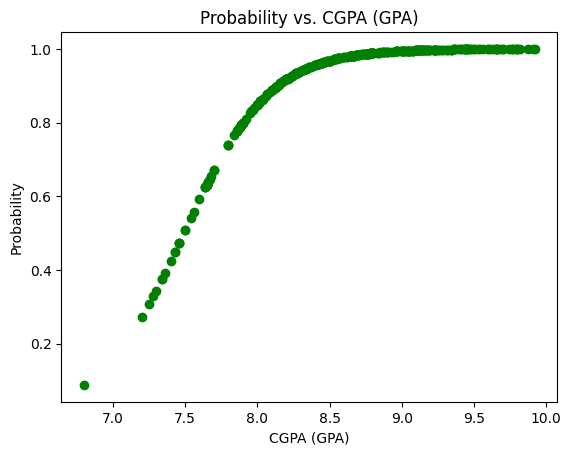

In [97]:
# f) Plot the probabilities vs GPA graph
plt.scatter(data['CGPA'], data['Probability'], marker='o', c='g', label='Probability of Admission')
plt.xlabel('CGPA (GPA)')
plt.ylabel('Probability')
plt.title('Probability vs. CGPA (GPA)')
plt.show()


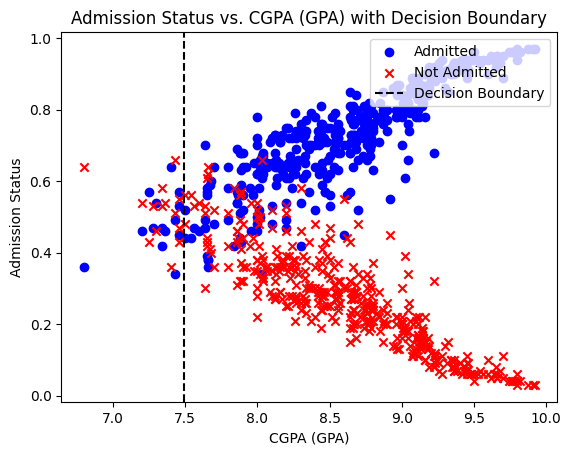

In [98]:
# g) Show the decision boundary of the regression model
X_values = np.linspace(data['CGPA'].min(), data['CGPA'].max(), 100)
decision_boundary = -intercept / slope  # Decision boundary where log odds = 0
plt.scatter(data['CGPA'], data['Admit'], marker='o', c='b', label='Admitted')
plt.scatter(data['CGPA'], 1 - data['Admit'], marker='x', c='r', label='Not Admitted')
plt.axvline(decision_boundary, color='k', linestyle='--', label='Decision Boundary')
plt.xlabel('CGPA (GPA)')
plt.ylabel('Admission Status')
plt.legend(loc='upper right')
plt.title('Admission Status vs. CGPA (GPA) with Decision Boundary')
plt.show()



In [99]:
# h) Show the accuracy of the logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression Model: {accuracy * 100:.2f}%")

Accuracy of the Logistic Regression Model: 87.50%


### 2. Perform logistic regression on the credit card dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [114]:
# a) Download credit card fraud detection dataset using https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download
data = pd.read_csv('creditcard.csv')

In [115]:
# b) Load the dataset, visualize it, show the data headers
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [116]:
# c) Preprocess the dataset if required

#i. Check duplicate data. If found remove it.
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))
data = data.drop_duplicates()
print('Duplicate rows removed')


Number of duplicate rows: 1081
Duplicate rows removed


In [117]:
#ii. Remove such colums which are not important. For example: Time
data = data.drop(columns=['Time'])

In [118]:
#iii. Separate the dataset into feature column and target column. The class column is the target column and everything else is a feature
X = data.drop(columns=['Class'])
y = data['Class']

In [119]:
#iv. Scale the dataset using standard scaling mechanism.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [120]:
#v. Partition dataset into training and testing set as 80%-20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


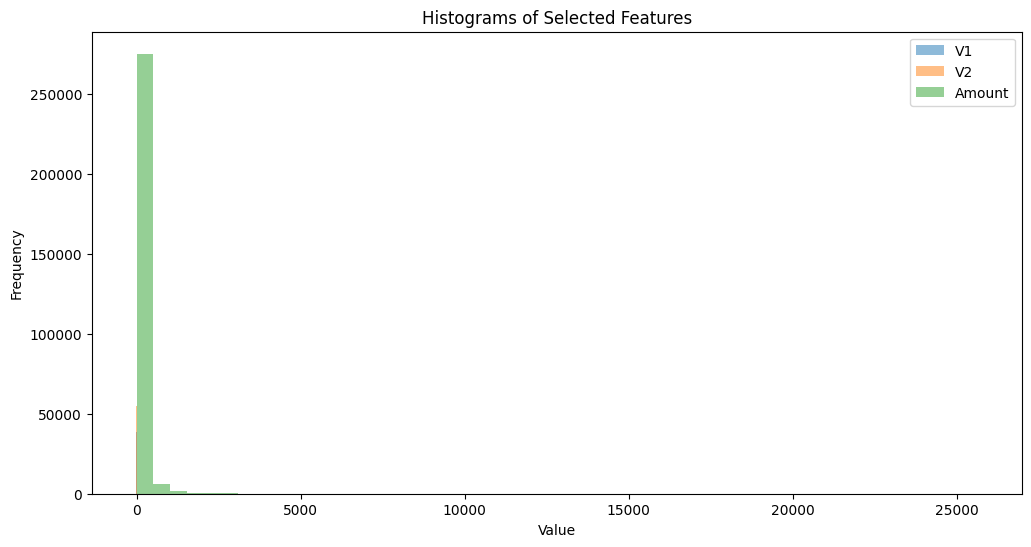

In [121]:
# d) Plot histograms/heatmaps to understand the values of each variable.
import matplotlib.pyplot as plt

# Plot histograms for selected features
plt.figure(figsize=(12, 6))
for col in ['V1', 'V2', 'Amount']:  # Adjust columns as needed
    plt.hist(data[col], bins=50, alpha=0.5, label=col)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='best')
plt.title('Histograms of Selected Features')
plt.show()


In [122]:
# e) Train the model using logistic regression.
from sklearn.linear_model import LogisticRegression

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [123]:
# f) Obtain the training accuracy.
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.9991937615648956


In [124]:
# g) Test the model. Obtain the testing accuracy.
test_accuracy = model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)


Testing Accuracy: 0.9991717477883904


In [125]:
# h) Generate confusion matrix, precision and recall based on TP, FP, FN, TN.
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)


Confusion Matrix:
[[56650     6]
 [   41    49]]
Precision: 0.8909090909090909
Recall: 0.5444444444444444
